# Stay-travel cluster classification in 1D: homebrew

## Exploring metrics of multimodal distributions

The main point here is to investigate multimodal distributions where there are multiple peaks in the histograms. 

Can the peaks be distinguished and somewhat separated so that there is a higher level of distinction among the bins in the distributions?

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [3]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
def get_iqr_masked(positions, iqr_fact = 3):
    # Calculate first and third quartiles
    q25 = np.quantile(positions,0.25, interpolation='lower')
    q75 = np.quantile(positions,0.75, interpolation='higher')

    # Calculate the interquartile range (IQR)
    iqr = abs(q75 - q25)

    #print(m, nn, np.where((noise_journey_sub[m:nn] > (q25 - iqr_fact * iqr)) & (noise_journey_sub[m:nn] < (q75 + iqr_fact * iqr))))
    mask=np.where(  (positions > (q25 - iqr_fact * iqr)) \
                  & (positions < (q75 + iqr_fact * iqr)))    
    
    return mask

def get_iqr_std(positions, iqr_fact = 3):
    
    if len(positions) > 1:

        mask=get_iqr_masked(positions, iqr_fact)
    
        return np.std(positions[mask])
    else:
        return positions[0]

def get_iqr_avg(positions, iqr_fact = 3):
    
    if len(positions) > 1:

        mask=get_iqr_masked(positions, iqr_fact)
    
        return np.mean(positions[mask])
    else:
        return positions[0]

In [ ]:
loc = 2.0
sig = 0.95
size = 250
unbalance_factor = 1.00 # change the location of the two spikes
test_1 = np.random.normal( loc,1*sig, int(size*unbalance_factor))
test_2 = np.random.normal(-loc,1.5*sig, int(size/unbalance_factor))
test_3 = np.random.normal( loc,2*sig, size)
test_4 = np.random.normal(-loc,4*sig, size)
test = np.concatenate((test_1,test_2, test_3, test_4))

np.random.shuffle(test)

mask = get_iqr_masked(test, iqr_fact = 1.1)

inds = np.arange(len(test))

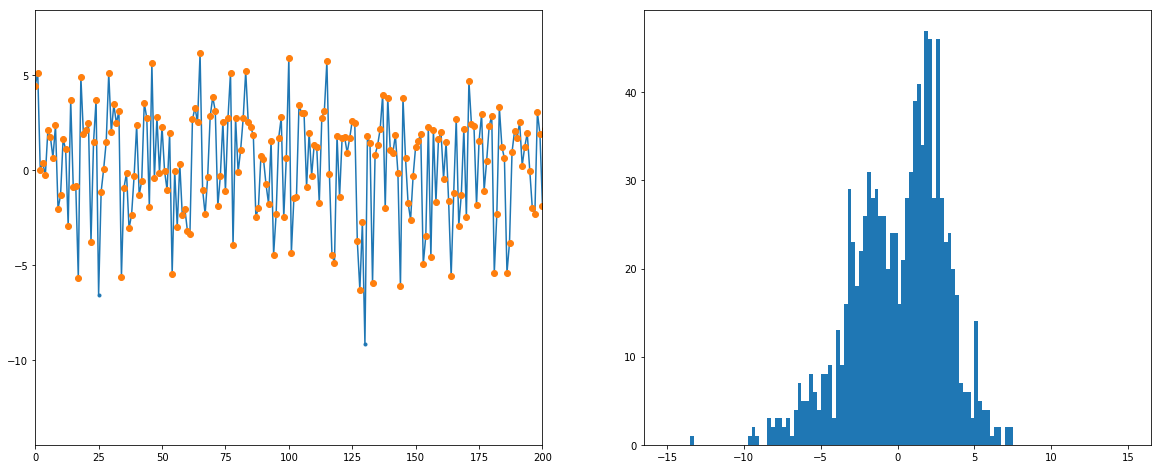

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,8))


ax =ax.reshape(2)
#plt.plot(test_1)
#plt.plot(test_2)
ax[0].plot(inds, test, '.-')
ax[0].plot(inds[mask], test[mask], 'o')
ax[0].set_xlim(0,200)

bins=np.arange(-15,15.25,0.25)
_ = ax[1].hist(test, bins=bins)

In [14]:
cols = np.digitize(test, bins=bins )


In [17]:
from scipy.sparse import csr_matrix

In [23]:
data = csr_matrix((np.ones(len(inds)), (inds, cols)), shape=(len(inds), len(bins))).toarray()

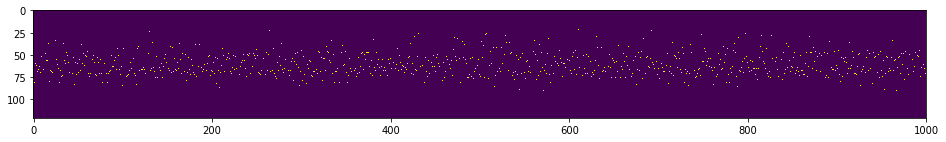

In [27]:
plt.figure(figsize=[16,10])
plt.imshow(data.transpose())

In [28]:
from numpy.linalg import svd

In [39]:
u,s,vh = svd(data.transpose())

In [51]:
u.shape

(121, 121)

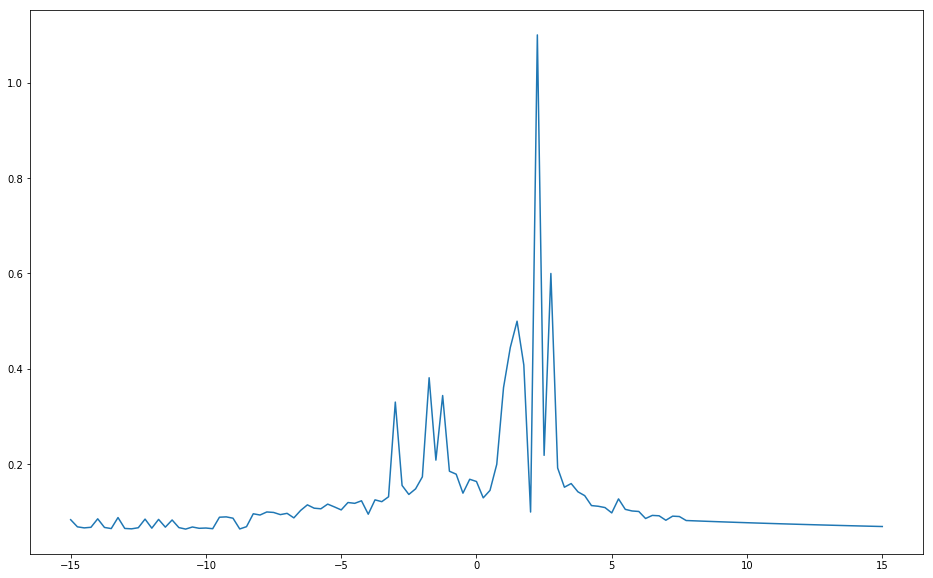

In [56]:
plt.figure(figsize=[16,10])
curve = np.abs(u[:,0])
curve /= np.sum(curve)
for n in range(1,121):
    curve_ = np.abs(u[:,n])
    curve_ /= np.sum(curve)
    curve += curve_
plt.plot(bins, curve)